In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
merc_dataset = pd.read_excel("merc.xlsx")
merc_dataset.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [3]:
merc_dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [4]:
merc_dataset.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

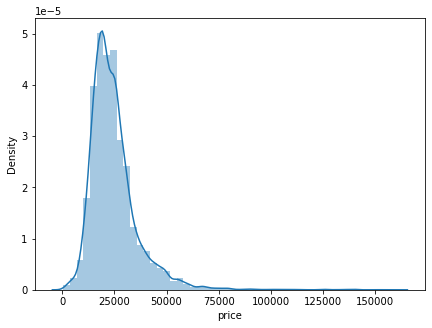

In [5]:
plt.figure(figsize=(7,5))
sns.distplot(merc_dataset.price)

###### There are so few datas for expensive cars, this would effect our model negatively. So we're going to get rid of them.

In [6]:
merc_dataset.groupby(by="year").count()

,price,transmission,mileage,tax,mpg,engineSize
year,,,,,,
1970,1,1,1,1,1,1
1997,1,1,1,1,1,1
1998,4,4,4,4,4,4
1999,1,1,1,1,1,1
2000,3,3,3,3,3,3
2001,10,10,10,10,10,10
2002,9,9,9,9,9,9
2003,7,7,7,7,7,7
2004,13,13,13,13,13,13


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1997'),
  Text(2, 0, '1998'),
  Text(3, 0, '1999'),
  Text(4, 0, '2000'),
  Text(5, 0, '2001'),
  Text(6, 0, '2002'),
  Text(7, 0, '2003'),
  Text(8, 0, '2004'),
  Text(9, 0, '2005'),
  Text(10, 0, '2006'),
  Text(11, 0, '2007'),
  Text(12, 0, '2008'),
  Text(13, 0, '2009'),
  Text(14, 0, '2010'),
  Text(15, 0, '2011'),
  Text(16, 0, '2012'),
  Text(17, 0, '2013'),
  Text(18, 0, '2014'),
  Text(19, 0, '2015'),
  Text(20, 0, '2016'),
  Text(21, 0, '2017'),
  Text(22, 0, '2018'),
  Text(23, 0, '2019'),
  Text(24, 0, '2020')])

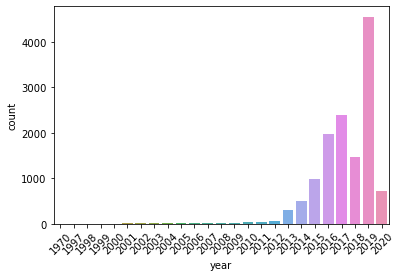

In [7]:
sns.countplot(merc_dataset["year"])
plt.xticks(rotation=45)

In [8]:
merc_dataset.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [9]:
merc_dataset.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

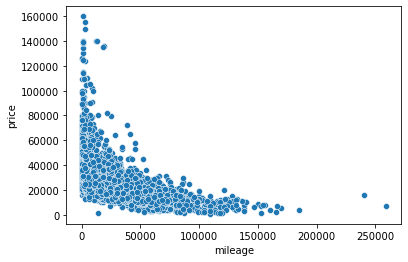

In [10]:
sns.scatterplot(data = merc_dataset, x = "mileage", y="price")

In [11]:
merc_dataset.sort_values("price",ascending=False)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


###### There is a common opinion about data cleaning, it says: "Using 99% of data or using 100% of data won't make any radical chances." According to this opinion, we're going to delete our the most expensive cars at 1%.

In [12]:
len(merc_dataset) * 0.01

131.19

In [13]:
merc_dataset.sort_values("price",ascending=False).iloc[131:,:]

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [14]:
ninety_nine_p_of_data = merc_dataset.sort_values("price",
                            ascending=False).iloc[131:,:]

In [15]:
ninety_nine_p_of_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

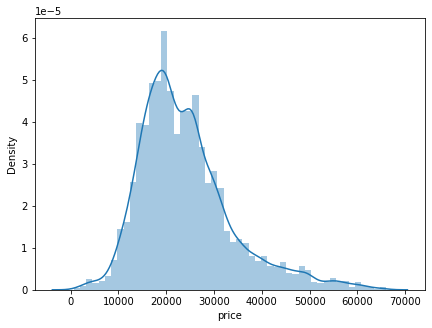

In [16]:
plt.figure(figsize=(7,5))
sns.distplot(ninety_nine_p_of_data["price"])

In [17]:
ninety_nine_p_of_data.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [18]:
ninety_nine_p_of_data[ninety_nine_p_of_data.year == 1970]

,year,price,transmission,mileage,tax,mpg,engineSize
12072,1970,24999,Automatic,14000,305,39.2,0.0


##### As you see above, there is only one car from 1970 and it is very expensive if we compare it with other cars. So we can also remove this  data.

In [19]:
ninety_nine_p_of_data = ninety_nine_p_of_data[ninety_nine_p_of_data.year != 1970]

In [20]:
ninety_nine_p_of_data[ninety_nine_p_of_data.year == 1970]

,year,price,transmission,mileage,tax,mpg,engineSize


In [21]:
ninety_nine_p_of_data.groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [22]:
ninety_nine_p_of_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [23]:
ninety_nine_p_of_data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [24]:
X = pd.concat([ninety_nine_p_of_data.iloc[:,0],ninety_nine_p_of_data.iloc[:,2:]],axis = 1)
y = ninety_nine_p_of_data.iloc[:,1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.33, random_state=0)

In [25]:
pd.get_dummies(X_train.transmission)

,Automatic,Manual,Other,Semi-Auto
1716,0,1,0,0
11779,1,0,0,0
6074,0,0,0,1
10442,0,1,0,0
7160,0,0,0,1
...,...,...,...,...
8789,0,0,0,1
1111,1,0,0,0
12093,1,0,0,0
10212,1,0,0,0


In [26]:
X_train

,year,transmission,mileage,tax,mpg,engineSize
1716,2019,Manual,23580,145,46.3,2.1
11779,2020,Automatic,5000,145,49.6,2.0
6074,2016,Semi-Auto,18072,265,42.8,3.0
10442,2017,Manual,21082,150,68.9,1.5
7160,2019,Semi-Auto,9172,145,46.3,1.5
...,...,...,...,...,...,...
8789,2019,Semi-Auto,3413,145,64.2,2.1
1111,2019,Automatic,1610,145,57.7,2.0
12093,2016,Automatic,29947,30,61.4,2.1
10212,2016,Automatic,31976,20,74.3,1.5


In [27]:
X_train = pd.concat([X_train.iloc[:,0],pd.get_dummies(X_train.transmission),X_train.iloc[:,2:]],axis = 1)

In [28]:
X_train

,year,Automatic,Manual,Other,Semi-Auto,mileage,tax,mpg,engineSize
1716,2019,0,1,0,0,23580,145,46.3,2.1
11779,2020,1,0,0,0,5000,145,49.6,2.0
6074,2016,0,0,0,1,18072,265,42.8,3.0
10442,2017,0,1,0,0,21082,150,68.9,1.5
7160,2019,0,0,0,1,9172,145,46.3,1.5
...,...,...,...,...,...,...,...,...,...
8789,2019,0,0,0,1,3413,145,64.2,2.1
1111,2019,1,0,0,0,1610,145,57.7,2.0
12093,2016,1,0,0,0,29947,30,61.4,2.1
10212,2016,1,0,0,0,31976,20,74.3,1.5


In [29]:
X_test = pd.concat([X_test.iloc[:,0],pd.get_dummies(X_test.transmission),X_test.iloc[:,2:]],axis = 1).reset_index()
X_test = pd.concat([X_test.iloc[:,:3], pd.DataFrame(0, index=np.arange(len(X_test)), columns=["Other"]), X_test.iloc[:,3:]],axis = 1)
X_test.set_index('index',inplace=True)

In [30]:
X_test

,year,Automatic,Other,Manual,Semi-Auto,mileage,tax,mpg,engineSize
index,,,,,,,,,
8590,2019,0,0,0,1,14619,145,46.3,1.5
366,2017,0,0,1,0,29559,20,68.9,1.5
9942,2015,1,0,0,0,63000,125,56.5,2.1
6634,2019,0,0,0,1,9829,145,54.3,2.0
512,2015,0,0,1,0,32648,0,74.3,1.5
...,...,...,...,...,...,...,...,...,...
5246,2016,1,0,0,0,25374,30,64.2,2.1
6666,2019,1,0,0,0,500,260,35.8,2.3
7761,2019,0,0,0,1,5265,145,55.4,2.0


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
X_train.shape

(8701, 9)

In [35]:
EPOCHS = 250
OUTPUT = 1

In [37]:
model = Sequential()

model.add(Dense(9,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(9,activation="relu"))

model.add(Dense(OUTPUT))

model.compile(optimizer = "adam", loss = "mse")

In [38]:
model.fit(x=X_train, y = y_train, validation_data = (X_test,y_test),
          batch_size = 200,
          epochs = EPOCHS)

Epoch 1/250
44/44 [==============================] - 0s 11ms/step - loss: 685532480.0000 - val_loss: 659480640.0000
Epoch 2/250
44/44 [==============================] - 0s 4ms/step - loss: 685509376.0000 - val_loss: 659443456.0000
Epoch 3/250
44/44 [==============================] - 0s 4ms/step - loss: 685448640.0000 - val_loss: 659341504.0000
Epoch 4/250
44/44 [==============================] - 0s 4ms/step - loss: 685256960.0000 - val_loss: 659000384.0000
Epoch 5/250
44/44 [==============================] - 0s 3ms/step - loss: 684620800.0000 - val_loss: 657953024.0000
Epoch 6/250
44/44 [==============================] - 0s 3ms/step - loss: 682876032.0000 - val_loss: 655324928.0000
Epoch 7/250
44/44 [==============================] - 0s 4ms/step - loss: 678832576.0000 - val_loss: 649643200.0000
Epoch 8/250
44/44 [==============================] - 0s 3ms/step - loss: 670591488.0000 - val_loss: 638696640.0000
Epoch 9/250
44/44 [==============================] - 0s 2ms/step - loss: 655649

44/44 [==============================] - 0s 2ms/step - loss: 64612984.0000 - val_loss: 61195736.0000
Epoch 73/250
44/44 [==============================] - 0s 2ms/step - loss: 64187816.0000 - val_loss: 60787708.0000
Epoch 74/250
44/44 [==============================] - 0s 2ms/step - loss: 63758348.0000 - val_loss: 60364356.0000
Epoch 75/250
44/44 [==============================] - 0s 2ms/step - loss: 63326680.0000 - val_loss: 59950116.0000
Epoch 76/250
44/44 [==============================] - 0s 2ms/step - loss: 62891416.0000 - val_loss: 59515488.0000
Epoch 77/250
44/44 [==============================] - 0s 2ms/step - loss: 62449388.0000 - val_loss: 59049680.0000
Epoch 78/250
44/44 [==============================] - 0s 2ms/step - loss: 62000092.0000 - val_loss: 58562404.0000
Epoch 79/250
44/44 [==============================] - 0s 2ms/step - loss: 61531664.0000 - val_loss: 58173108.0000
Epoch 80/250
44/44 [==============================] - 0s 2ms/step - loss: 61049312.0000 - val_loss: 5

44/44 [==============================] - 0s 3ms/step - loss: 24023972.0000 - val_loss: 23762104.0000
Epoch 144/250
44/44 [==============================] - 0s 5ms/step - loss: 23818522.0000 - val_loss: 23568110.0000
Epoch 145/250
44/44 [==============================] - 0s 5ms/step - loss: 23625048.0000 - val_loss: 23517038.0000
Epoch 146/250
44/44 [==============================] - 0s 6ms/step - loss: 23425420.0000 - val_loss: 23373024.0000
Epoch 147/250
44/44 [==============================] - 0s 5ms/step - loss: 23240510.0000 - val_loss: 23203452.0000
Epoch 148/250
44/44 [==============================] - 0s 2ms/step - loss: 23084020.0000 - val_loss: 23141304.0000
Epoch 149/250
44/44 [==============================] - 0s 2ms/step - loss: 22927244.0000 - val_loss: 23194962.0000
Epoch 150/250
44/44 [==============================] - 0s 2ms/step - loss: 22813926.0000 - val_loss: 23151604.0000
Epoch 151/250
44/44 [==============================] - 0s 2ms/step - loss: 22673642.0000 - val

44/44 [==============================] - 0s 5ms/step - loss: 19976122.0000 - val_loss: 22714092.0000
Epoch 215/250
44/44 [==============================] - 0s 5ms/step - loss: 19938190.0000 - val_loss: 22686770.0000
Epoch 216/250
44/44 [==============================] - 0s 3ms/step - loss: 19920648.0000 - val_loss: 23034968.0000
Epoch 217/250
44/44 [==============================] - 0s 5ms/step - loss: 19895206.0000 - val_loss: 22630438.0000
Epoch 218/250
44/44 [==============================] - 0s 5ms/step - loss: 19902464.0000 - val_loss: 22618632.0000
Epoch 219/250
44/44 [==============================] - 0s 4ms/step - loss: 19872192.0000 - val_loss: 22930160.0000
Epoch 220/250
44/44 [==============================] - 0s 3ms/step - loss: 19850528.0000 - val_loss: 22726384.0000
Epoch 221/250
44/44 [==============================] - 0s 5ms/step - loss: 19844036.0000 - val_loss: 22751890.0000
Epoch 222/250
44/44 [==============================] - 0s 5ms/step - loss: 19830882.0000 - val

In [39]:
loss_data = pd.DataFrame(model.history.history)
loss_data.head()

,loss,val_loss
0,685532480.0,659480640.0
1,685509376.0,659443456.0
2,685448640.0,659341504.0
3,685256960.0,659000384.0
4,684620800.0,657953024.0


<AxesSubplot:>

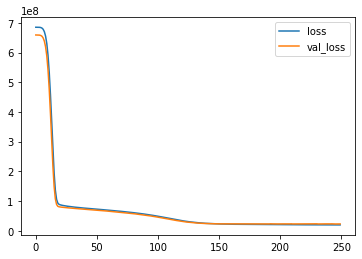

In [40]:
loss_data.plot()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
prediction_array = model.predict(X_test)
prediction_array

array([[23756.957 ],
       [20333.299 ],
       [14757.3125],
       ...,
       [29505.316 ],
       [19947.443 ],
       [37813.727 ]], dtype=float32)

In [44]:
mean_absolute_error(y_test, prediction_array)

3548.8654723672516

In [45]:
mean_squared_error(y_test, prediction_array)

22670142.1901619

In [46]:
merc_dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


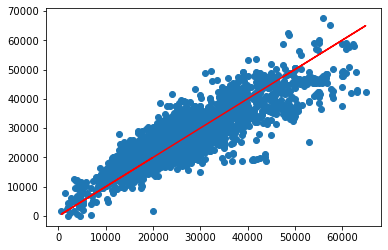

In [49]:
plt.scatter(y_test,prediction_array)
plt.plot(y_test,y_test,c = "red")

In [50]:
merc_dataset.iloc[2]

year                 2016
price               49948
transmission    Automatic
mileage              6200
tax                   555
mpg                  28.0
engineSize            5.5
Name: 2, dtype: object